In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = 'D:/000000001_ENEM/DADOS_PROCESSADOS/'
path_rede = 'D:/000000001_ENEM/DADOS_REDE/'

In [3]:
enem = pd.read_csv(path+'base_enem_completa.csv', sep = ';', encoding = 'ISO-8859-1', low_memory = False)

In [4]:
## Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
## Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?
## Q003 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
## Q004 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).


In [5]:
##['Q003','Q004']
## Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
## Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
## Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
## Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
## Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
## Não sei.

In [6]:
vazios = pd.DataFrame({'Tipos':enem.dtypes, 'NaN':enem.isna().sum(),'Total':enem.count()}).sort_values('NaN', ascending = False)
vazios[vazios['NaN'] > 0]

,Tipos,NaN,Total
NU_NOTA_MT,float64,106511,522657
NU_NOTA_CN,float64,102117,527051
NU_NOTA_LC,float64,92374,536794
NU_NOTA_CH,float64,87980,541188
NU_NOTA_REDACAO,float64,74236,554932
NU_NOTA_COMP5,float64,74236,554932
NU_NOTA_COMP4,float64,74236,554932
NU_NOTA_COMP3,float64,74236,554932
NU_NOTA_COMP2,float64,74236,554932
NU_NOTA_COMP1,float64,74236,554932


In [7]:
enem = enem.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [8]:
enem['NU_NOTA_MT'].isnull().sum()

0

In [9]:
enem['NU_NOTA_CH'].isnull().sum()

0

In [10]:
enem['NU_NOTA_CN'].isnull().sum()

0

In [11]:
enem['NU_NOTA_LC'].isnull().sum()

0

In [12]:
enem['NU_IDADE'].describe()

count    521491.000000
mean         18.238317
std           3.503176
min          11.000000
25%          17.000000
50%          18.000000
75%          18.000000
max          82.000000
Name: NU_IDADE, dtype: float64

### Participantes com idade inferior (7 anos é a menor idade)

In [13]:
enem = enem [enem['NU_IDADE']>14]

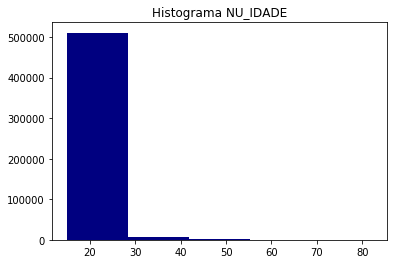

In [14]:
plt.hist(enem['NU_IDADE'],bins=5, color='#000080')
plt.title('Histograma NU_IDADE')
plt.show()

In [15]:
conclusao = enem['TP_ST_CONCLUSAO']
conclusao.value_counts()

Estou cursando e concluirei o Ensino Médio no ano corrente        521468
Não concluí e não estou cursando o Ensino Médio                        2
Estou cursando e concluirei o Ensino Médio após o ano corrente         1
Name: TP_ST_CONCLUSAO, dtype: int64

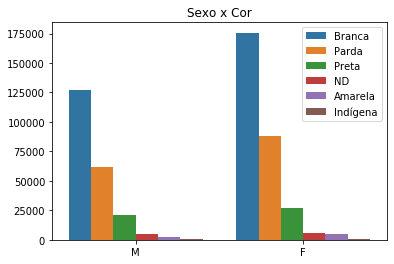

In [16]:
sns.countplot(enem['TP_SEXO'],hue=enem['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

In [17]:
rede_concorrentes = enem[(enem['ind_rede'] == 'Sim') | (enem['ind_concorrente'] =='Sim')]

In [18]:
##percentual de participantes da rede
rede_concorrentes['ind_rede'].value_counts()/rede_concorrentes.shape[0]*100

Não    84.658496
Sim    15.341504
Name: ind_rede, dtype: float64

### Apenas 15 % do público (Rede + Concorrentes)

In [19]:
enem['ind_rede'].value_counts()/enem.shape[0]*100

Não    99.212612
Sim     0.787388
Name: ind_rede, dtype: float64

In [20]:
notas_rede = enem[enem['ind_rede'] == 'Sim'][['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO', 'nome_entidade_rede']]
notas_concorrentes = enem[enem['ind_concorrente'] == 'Sim'][['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH','NU_ANO']]
nao_rede = enem[enem['ind_rede'] == 'Não'][['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO']]

In [21]:
notas_rede =notas_rede[['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO']]
notas_rede ['TIPO'] = 'Rede'
notas_concorrentes ['TIPO'] = 'Concorrente'
rede_concorrentes = pd.concat([notas_rede, notas_concorrentes])

In [22]:
notas_rede.groupby(['NU_ANO']).mean()
## distribuição das notas graficamente (gráfico de distribuição normal)

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,666.720721,562.579099,614.718919,586.389279,633.577928
2016,670.289331,565.423418,608.826763,589.845479,608.082550
2017,655.920484,586.057476,636.342697,577.771132,605.287295
2018,703.361345,597.170588,659.680672,610.672269,650.182353
2019,733.192182,564.041042,673.127687,592.743648,607.907818


Text(0.5, 1.0, 'NOTAS REDAÇÃO')

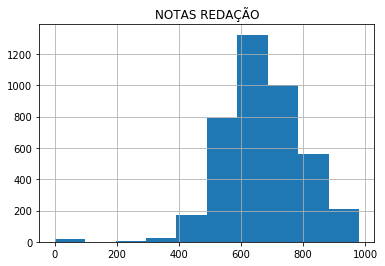

In [23]:
notas_rede['NU_NOTA_REDACAO'].hist()
plt.title('NOTAS REDAÇÃO')

Text(0.5, 1.0, 'NOTAS CIÊNCIAS DA NATUREZA')

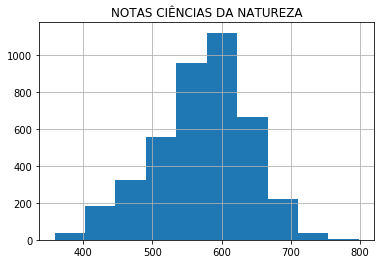

In [24]:
notas_rede['NU_NOTA_CN'].hist()
plt.title('NOTAS CIÊNCIAS DA NATUREZA')

Text(0.5, 1.0, 'NOTAS MATEMÁTICA')

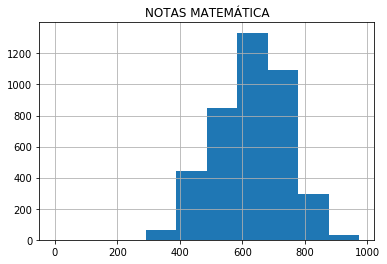

In [25]:
notas_rede['NU_NOTA_MT'].hist()
plt.title('NOTAS MATEMÁTICA')

Text(0.5, 1.0, 'NOTAS LINGUAGENS E CÓDIGOS')

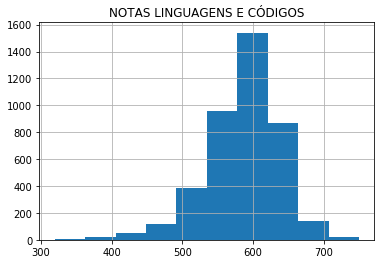

In [26]:
notas_rede['NU_NOTA_LC'].hist()
plt.title('NOTAS LINGUAGENS E CÓDIGOS')

Text(0.5, 1.0, 'NOTAS CIÊNCIAS HUMANAS')

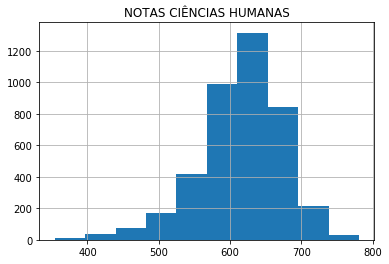

In [27]:
notas_rede['NU_NOTA_CH'].hist()
plt.title('NOTAS CIÊNCIAS HUMANAS')

In [28]:
notas_rede.groupby(['NU_ANO']).std()
## desvio padrão das notas rede

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,131.421662,71.833488,119.183619,52.995012,52.602516
2016,123.862818,71.396277,115.364195,59.690073,59.662285
2017,120.411437,62.194548,100.881297,48.762721,61.559164
2018,142.122395,61.913476,102.430741,47.343662,51.976573
2019,121.297656,59.534644,94.254333,36.466649,52.301084


In [29]:
notas_concorrentes.groupby(['NU_ANO']).std()
## desvio padrão das notas dos concorrentes

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,134.107066,79.050057,130.026811,59.741728,57.826472
2016,133.111841,77.865733,124.022498,61.333739,61.683793
2017,134.855854,68.992524,113.975901,51.713899,68.337989
2018,153.693799,82.950767,114.836480,53.266599,59.325712
2019,127.466424,63.365043,103.868068,40.527881,57.447620


In [30]:
enem.groupby(['NU_ANO']).std()[['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH']]
## desvio padrão geral das notas

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,138.783706,71.321763,109.218318,70.710308,69.408288
2016,148.995805,73.613376,104.307148,68.797334,72.162695
2017,170.792707,70.651668,104.441876,64.157923,79.838932
2018,178.122837,72.059089,100.487124,70.194562,76.405279
2019,171.245025,74.137269,108.399904,59.124490,77.149643


In [31]:
variacao=notas_rede.groupby(['NU_ANO']).mean()
## avaliação da variação da média por ano
variacao.pct_change()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,NaN,NaN,NaN,NaN,NaN
2016,0.005352,0.005056,-0.009585,0.005894,-0.040240
2017,-0.021437,0.036493,0.045195,-0.020470,-0.004597
2018,0.072327,0.018962,0.036675,0.056945,0.074171
2019,0.042412,-0.055478,0.020384,-0.029359,-0.065020


In [32]:
notas_concorrentes.groupby(['NU_ANO']).mean()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,677.811245,572.164432,626.590536,590.489977,636.501414
2016,688.276725,582.180711,638.320808,601.309760,620.712853
2017,684.503650,595.646387,653.663869,584.674033,610.271697
2018,707.694064,591.325837,668.921499,611.609855,650.924201
2019,767.005265,577.064230,681.177207,593.787334,607.935615


In [33]:
nao_rede.groupby(['NU_ANO']).mean()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH
NU_ANO,,,,,
2015,543.612057,481.074417,475.332588,510.492532,559.849996
2016,546.538996,483.003524,498.356561,525.803735,540.529551
2017,547.280570,513.644053,526.659091,515.638391,525.835573
2018,525.053296,496.456927,538.097939,533.581850,573.296189
2019,601.368204,481.991906,536.452846,530.668387,519.606978


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

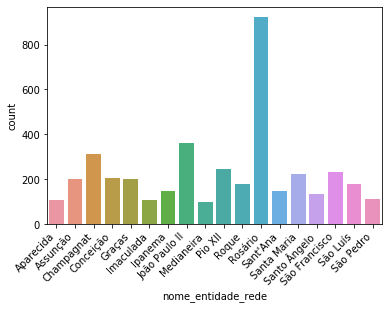

In [34]:
notas_rede = enem[enem['ind_rede'] == 'Sim'][['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO', 'nome_entidade_rede']].sort_values('nome_entidade_rede')
sns.countplot(x='nome_entidade_rede', data=notas_rede)
plt.xticks(rotation = 45, ha = 'right')
## cruzar com desempenho

In [35]:
estudantes_unidades = pd.read_excel(path_rede+'número_estudantes_unidade.xlsx')
estudantes_unidades

,Unidade,Estudantes,Ano
0,Rosário,823,2015
1,Rosário,714,2019
2,Rosário,582,2017
3,Rosário,562,2016
4,Rosário,542,2018
...,...,...,...
85,Medianeira,69,2016
86,São Pedro,66,2018
87,Aparecida,65,2016
88,Aparecida,63,2017


In [36]:
qtd_rede = notas_rede.groupby(['nome_entidade_rede','NU_ANO']).count()
qtd_rede['PARTICIPANTES'] = qtd_rede['NU_NOTA_REDACAO']
percentual_participantes = pd.merge(qtd_rede, estudantes_unidades, left_on = ['nome_entidade_rede','NU_ANO'], right_on = ['Unidade','Ano'], how = 'inner')[['PARTICIPANTES', 'Unidade','Estudantes', 'Ano']]
percentual_participantes['% Participantes'] = percentual_participantes['PARTICIPANTES']/percentual_participantes['Estudantes']*100

In [37]:
## totais de alunos de cada unidade (percentual)
percentual_participantes

,PARTICIPANTES,Unidade,Estudantes,Ano,% Participantes
0,30,Aparecida,103,2015,29.126214
1,32,Aparecida,65,2016,49.230769
2,28,Aparecida,63,2017,44.444444
3,15,Aparecida,86,2019,17.441860
4,54,Assunção,232,2015,23.275862
...,...,...,...,...,...
73,27,São Luís,175,2019,15.428571
74,32,São Pedro,143,2015,22.377622
75,17,São Pedro,79,2016,21.518987
76,48,São Pedro,89,2017,53.932584


In [38]:
redacao_rede = enem[enem['ind_rede'] == 'Sim'][['TP_STATUS_REDACAO', 'NU_ANO', 'nome_entidade_rede', 'ind_rede']]

In [39]:
status_redacao_rede = redacao_rede.groupby(['TP_STATUS_REDACAO','NU_ANO','nome_entidade_rede']).count()
status_redacao_rede
## análise por escola
## entre si, concorrentes e geral, por área de conhecimento ao longo do tempo

ind_rede
TP_STATUS_REDACAO  NU_ANO nome_entidade_rede          
Em branco          2015   Sant'Ana                   1
                   2016   Aparecida                  1
                   2017   Aparecida                  1
                          Santa Maria                1
                   2019   São Luís                   1
...                                                ...
Sem problemas      2019   São Francisco             19
                          São Luís                  26
                          São Pedro                 15
Texto insuficiente 2015   Aparecida                  1
                   2016   Assunção                   1

[95 rows x 1 columns]

In [40]:
enem.groupby(['TP_STATUS_REDACAO','NU_ANO']).count()

CO_ESCOLA  CO_MUNICIPIO_RESIDENCIA  CO_UF_ESC  \
TP_STATUS_REDACAO       NU_ANO                                                  
Anulada                 2015           15                       15         15   
                        2016           14                       14         14   
                        2017           11                       11         11   
                        2018           47                       47         47   
                        2019           42                       42         42   
Cópia texto motivador   2015           96                       96         96   
                        2016           91                       91         91   
                        2017           51                       51         51   
                        2018          148                      148        148   
                        2019          197                      197        197   
Em branco               2015          618                      618        618   
                        2016         1213                     1213       1213   
                        2017          741                      741        741   
                        2018          714                      714        714   
                        2019          818                      818        818   
Fere Direitos Humanos   2015          250                      250        250   
                        2016          131                      131        131   
Fuga ao tema            2015          317                      317        317   
                        2016          635                      635        635   
                        2017         3886                     3886       3886   
                        2018          343                      343        343   
                        2019          326                      326        326   
Não atendimento ao tipo 2015           76                       76         76   
                        2016           38                       38         38   
                        2017           56                       56         56   
                        2018           31                       31         31   
                        2019           35                       35         35   
Parte desconectada      2015           27                       27         27   
                        2016          137                      137        137   
                        2017           78                       78         78   
                        2018           35                       35         35   
                        2019           27                       27         27   
Sem problemas           2015       125578                   125578     125578   
                        2016       127737                   127737     127737   
                        2017       108968                   108968     108968   
                        2018        75983                    75983      75983   
                        2019        71193                    71193      71193   
Texto insuficiente      2015           82                       82         82   
                        2016          163                      163        163   
                        2017          272                      272        272   
                        2018          122                      122        122   
                        2019          129                      129        129   

                                IN_TREINEIRO  NO_MUNICIPIO_ESC  NU_IDADE  \
TP_STATUS_REDACAO       NU_ANO                                             
Anulada                 2015              15                15        15   
                        2016              14                14        14   
                        2017              11                11        11   
                        2018              47                47        47   
           

In [41]:
redacao_rede['TP_STATUS_REDACAO'].unique()

array(['Sem problemas', 'Fuga ao tema', 'Fere Direitos Humanos',
       'Em branco', 'Texto insuficiente'], dtype=object)

In [42]:
notas_rede.corr()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_ANO
NU_NOTA_REDACAO,1.000000,0.323921,0.324823,0.424134,0.394536,0.143901
NU_NOTA_CN,0.323921,1.000000,0.612761,0.536110,0.596925,0.053719
NU_NOTA_MT,0.324823,0.612761,1.000000,0.478400,0.532891,0.185954
NU_NOTA_LC,0.424134,0.536110,0.478400,1.000000,0.675671,0.025486
NU_NOTA_CH,0.394536,0.596925,0.532891,0.675671,1.000000,-0.117520
NU_ANO,0.143901,0.053719,0.185954,0.025486,-0.117520,1.000000


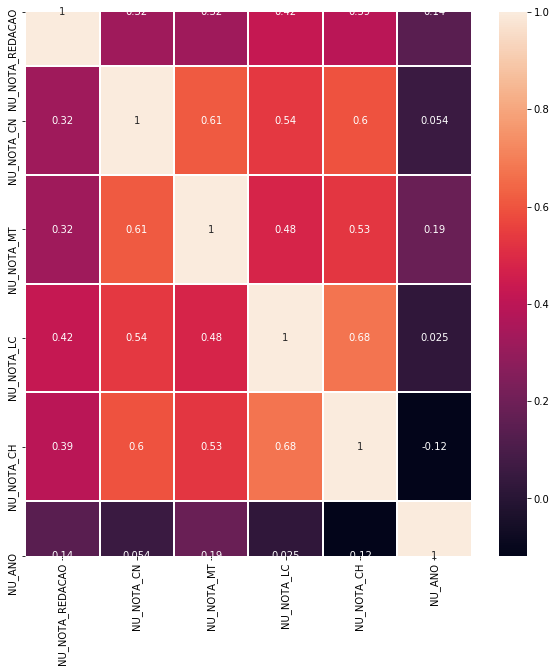

In [43]:
plt.figure(figsize=[10,10])
sns.heatmap(notas_rede.corr(), annot=True, linewidths=1)

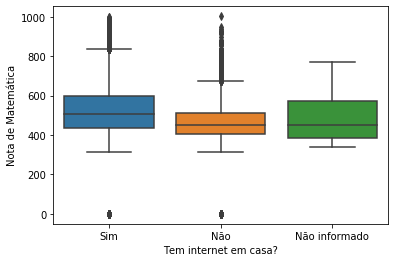

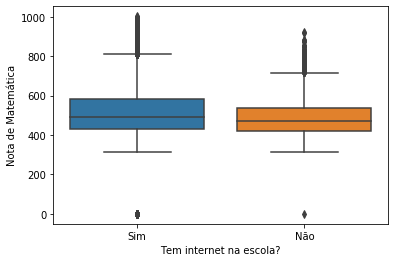

In [44]:
## nota matemática x internet
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_MT'])
plt.xlabel('Tem internet em casa?')
plt.ylabel('Nota de Matemática')
plt.show()
sns.boxplot(x=enem['IN_INTERNET'], y=enem['NU_NOTA_MT'])
plt.xlabel('Tem internet na escola?')
plt.ylabel('Nota de Matemática')
plt.show()

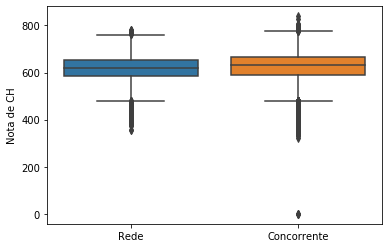

In [45]:
sns.boxplot(x=rede_concorrentes['TIPO'], y=rede_concorrentes['NU_NOTA_CH'])
plt.xlabel('')
plt.ylabel('Nota de CH')
plt.show()

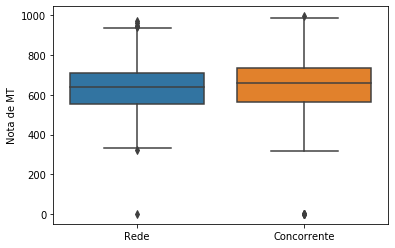

In [46]:
sns.boxplot(x=rede_concorrentes['TIPO'], y=rede_concorrentes['NU_NOTA_MT'])
plt.xlabel('')
plt.ylabel('Nota de MT')
plt.show()

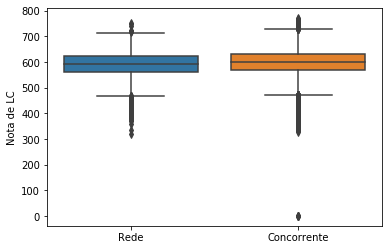

In [47]:
sns.boxplot(x=rede_concorrentes['TIPO'], y=rede_concorrentes['NU_NOTA_LC'])
plt.xlabel('')
plt.ylabel('Nota de LC')
plt.show()

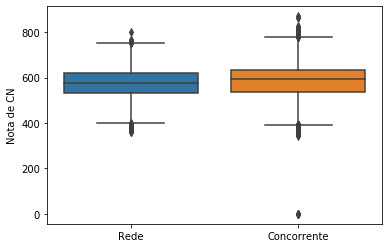

In [48]:
sns.boxplot(x=rede_concorrentes['TIPO'], y=rede_concorrentes['NU_NOTA_CN'])
plt.xlabel('')
plt.ylabel('Nota de CN')
plt.show()

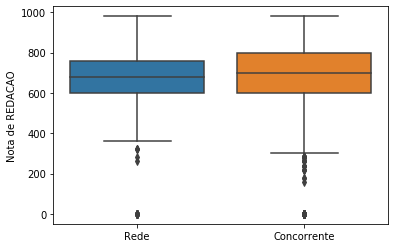

In [49]:
sns.boxplot(x=rede_concorrentes['TIPO'], y=rede_concorrentes['NU_NOTA_REDACAO'])
plt.xlabel('')
plt.ylabel('Nota de REDACAO')
plt.show()

In [50]:
enem['Q006_new'] = enem['Q006']
enem['Q006_new'].replace(to_replace = 'Nenhuma renda', value = '1 - Até R$ 1.996,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'Até R$ 998,00', value = '1 - Até R$ 1.996,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 998,01 até R$ 1.497,00', value = '1 - Até R$ 1.996,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 1.497,01 até R$ 1.996,00', value = '1 - Até R$ 1.996,00', inplace = True)

enem['Q006_new'].replace(to_replace = 'De R$ 1.996,01 até R$ 2.495,00', value = '2 - Até R$ 5.988,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 2.495,01 até R$ 2.994,00', value = '2 - Até R$ 5.988,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 2.994,01 até R$ 3.992,00', value = '2 - Até R$ 5.988,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 3.992,01 até R$ 4.990,00', value = '2 - Até R$ 5.988,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 4.990,01 até R$ 5.988,00', value = '2 - Até R$ 5.988,00', inplace = True)

enem['Q006_new'].replace(to_replace = 'De R$ 5.988,01 até R$ 6.986,00', value = '3 - Até R$ 9.980,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 6.986,01 até R$ 7.984,00', value = '3 - Até R$ 9.980,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 7.984,01 até R$ 8.982,00', value = '3 - Até R$ 9.980,00', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 8.982,01 até R$ 9.980,00', value = '3 - Até R$ 9.980,00', inplace = True)

enem['Q006_new'].replace(to_replace = 'De R$ 9.980,01 até R$ 11.976,00', value = '4 - Acima de R$ 9.980,01', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 11.976,01 até R$ 14.970,00', value = '4 - Acima de R$ 9.980,01', inplace = True)
enem['Q006_new'].replace(to_replace = 'De R$ 14.970,01 até R$ 19.960,00', value = '4 - Acima de R$ 9.980,01', inplace = True)
enem['Q006_new'].replace(to_replace = 'Mais de R$ 19.960,00', value = '4 -Acima de R$ 9.980,01', inplace = True)


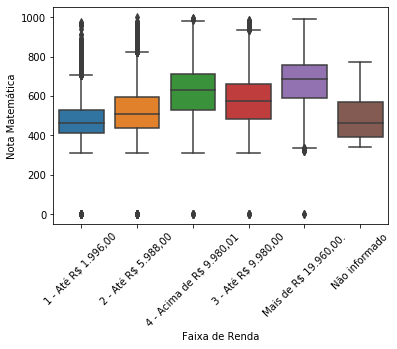

In [51]:
sns.boxplot(x=enem['Q006_new'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Matemática')
plt.show()

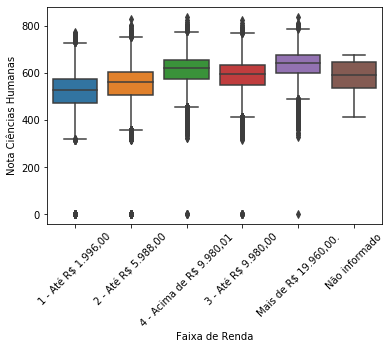

In [52]:
sns.boxplot(x=enem['Q006_new'], y=enem['NU_NOTA_CH'])
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Ciências Humanas')
plt.show()

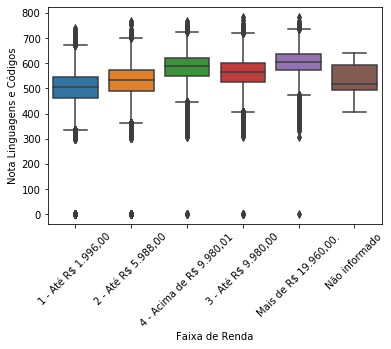

In [53]:
sns.boxplot(x=enem['Q006_new'], y=enem['NU_NOTA_LC'])
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Linguagens e Códigos')
plt.show()

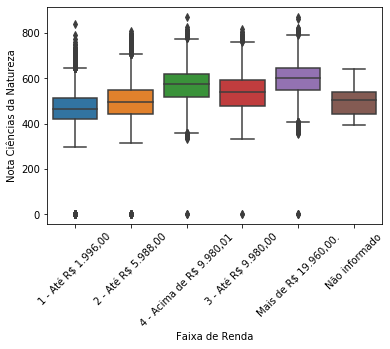

In [54]:
sns.boxplot(x=enem['Q006_new'], y=enem['NU_NOTA_CN'])
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Ciências da Natureza')
plt.show()

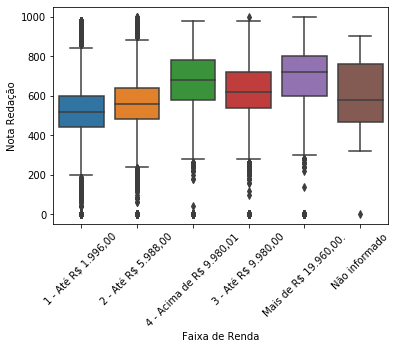

In [55]:
sns.boxplot(x=enem['Q006_new'], y=enem['NU_NOTA_REDACAO'])
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Redação')
plt.show()

In [56]:
enem.columns.values

array(['CO_ESCOLA', 'CO_MUNICIPIO_RESIDENCIA', 'CO_UF_ESC',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'NU_ANO', 'NU_IDADE',
       'NU_INSCRICAO', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'SG_UF_ESC', 'SG_UF_RESIDENCIA', 'TP_ANO_CONCLUIU', 'TP_COR_RACA',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'TP_ESCOLA',
       'TP_ESTADO_CIVIL', 'TP_LINGUA', 'TP_LOCALIZACAO_ESC',
       'TP_NACIONALIDADE', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_SEXO', 'TP_SIT_FUNC_ESC',
       'TP_STATUS_REDACAO', 'TP_ST_CONCLUSAO', 'nome_entidade_rede',
       'cod_entidade_rede', 'ind_rede', 'nome_concorrente'

In [57]:
enem['Q006_new'].unique()

array(['1 - Até R$ 1.996,00', '2 - Até R$ 5.988,00',
       '4 - Acima de R$ 9.980,01', '3 - Até R$ 9.980,00',
       'Mais de R$ 19.960,00.', 'Não informado'], dtype=object)

In [58]:
enem.filter(items=['Q001', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['Q001']).mean().sort_values(by ='NU_NOTA_REDACAO')

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
Q001,,,,,
Nunca estudou,456.485582,505.406531,451.560585,480.680971,456.094785
Não completou a 4ª série/5º ano do Ensino Fundamental,501.101291,518.527295,471.634719,495.971193,466.090958
Não sei.,510.560485,527.847921,483.015620,506.826429,473.685083
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",528.026382,531.014747,489.905057,508.781731,476.292154
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",535.980417,534.499270,495.583460,513.623929,480.736691
"Completou o Ensino Médio, mas não completou a Faculdade",566.583665,551.795405,519.855742,530.422404,497.290845
Não informado,588.181818,574.927273,494.304545,534.054545,506.036364
"Completou a Faculdade, mas não completou a Pós-graduação",627.628740,584.762494,575.269063,560.077753,535.489312
Completou a Pós-graduação,659.457208,602.095171,609.423660,574.668416,557.879548


In [59]:
enem.filter(items=['Q002', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['Q002']).mean().sort_values(by ='NU_NOTA_REDACAO')

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
Q002,,,,,
Nunca estudou,439.185847,501.499811,445.156539,476.250407,453.123133
Não sei.,489.935845,520.432231,475.772041,496.169513,470.188318
Não completou a 4ª série/5º ano do Ensino Fundamental,495.272513,516.596857,466.424125,493.533655,463.452434
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",518.469680,527.475545,482.527812,504.553578,472.040366
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",524.479113,529.742649,486.874228,509.039805,474.944406
"Completou o Ensino Médio, mas não completou a Faculdade",555.566725,545.783426,511.973409,525.078368,491.596818
Não informado,588.181818,574.927273,494.304545,534.054545,506.036364
"Completou a Faculdade, mas não completou a Pós-graduação",614.431535,576.747571,564.111610,553.030808,527.383592
Completou a Pós-graduação,635.856094,588.195809,584.013628,561.818217,541.240036


In [60]:
enem['esc_fam'] = enem['Q001']+'|'+enem['Q002']

In [61]:
enem.filter(items=['esc_fam', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['esc_fam']).mean().sort_values(by ='NU_NOTA_REDACAO')
##pai|mãe

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
esc_fam,,,,,
Nunca estudou|Nunca estudou,407.826731,492.040992,434.799759,464.977437,447.249225
Não sei.|Nunca estudou,441.798319,503.578992,438.557983,480.203361,450.885504
Não completou a 4ª série/5º ano do Ensino Fundamental|Nunca estudou,447.937868,503.610819,447.984842,478.191055,453.591912
Nunca estudou|Não sei.,457.326203,499.975401,448.690909,473.435294,454.150802
Não completou a 4ª série/5º ano do Ensino Fundamental|Não sei.,457.688229,506.438070,457.408484,483.609650,456.535525
...,...,...,...,...,...
"Completou a Pós-graduação|Completou o Ensino Médio, mas não completou a Faculdade",615.610840,579.333200,565.379017,556.127958,529.475818
"Completou a Faculdade, mas não completou a Pós-graduação|Completou a Faculdade, mas não completou a Pós-graduação",647.103431,594.460774,595.145135,569.163309,547.940696
"Completou a Faculdade, mas não completou a Pós-graduação|Completou a Pós-graduação",661.836466,603.594168,607.409619,575.463986,557.744362


In [62]:
##['Q003','Q004']
## Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
## Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
## Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
## Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
## Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
## Não sei.

In [63]:
enem.filter(items=['Q003', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['Q003']).mean().sort_values(by ='NU_NOTA_REDACAO')
##pai ou homem

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
Q003,,,,,
Grupo 1,504.204700,521.117326,478.847320,494.514503,471.835342
Não sei.,516.495855,528.722890,486.199504,507.781656,474.886250
Grupo 2,527.022382,529.080570,486.664408,510.516774,474.745235
Grupo 3,533.919564,535.236839,494.877446,514.291152,479.702910
Não informado,588.181818,574.927273,494.304545,534.054545,506.036364
Grupo 4,600.162179,569.784657,547.306927,546.687367,516.778959
Grupo 5,658.260914,602.654508,609.769105,574.082554,557.901693


In [64]:
enem.filter(items=['Q004', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['Q004']).mean().sort_values(by ='NU_NOTA_REDACAO')
##mãe ou mulher

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
Q004,,,,,
Grupo 1,501.711529,521.139676,479.357648,492.774623,471.614224
Grupo 2,526.983692,530.206362,488.019607,510.642595,475.848942
Não sei.,529.007883,537.085698,499.257905,513.500077,485.058527
Grupo 3,537.290449,537.955352,499.559646,516.512240,482.309773
Não informado,588.181818,574.927273,494.304545,534.054545,506.036364
Grupo 4,600.104811,569.475742,547.796524,545.998867,516.718018
Grupo 5,665.034157,605.974288,617.048861,577.206128,562.412049


In [65]:
enem['grupo_fam'] = enem['Q003']+'|'+enem['Q004']

In [66]:
enem.filter(items=['grupo_fam', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN']).groupby(['grupo_fam']).mean().sort_values(by ='NU_NOTA_REDACAO')

,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN
grupo_fam,,,,,
Não sei.|Grupo 1,481.651090,511.330218,467.671417,489.215888,461.932087
Grupo 1|Grupo 2,494.875163,514.849731,468.558856,492.620122,465.750951
Grupo 2|Grupo 1,497.815933,517.678658,473.032956,494.659916,469.119665
Grupo 1|Não sei.,498.190416,518.437137,473.813272,493.822037,471.107125
Grupo 1|Grupo 1,498.747348,519.769853,477.339881,490.254038,470.493538
Não sei.|Não sei.,500.233725,522.317060,478.707252,498.056345,472.013917
Não sei.|Grupo 2,507.011993,522.368605,476.135021,503.653428,466.727641
Grupo 3|Grupo 1,517.120125,527.665242,488.296193,504.438471,474.962933
Grupo 1|Grupo 3,518.297018,527.692584,485.124121,503.874121,476.509748
